## Exercise 2

### Beginners:


  - Read the file `Orange_1.tsv`
  - Print the height column
  - Print the data for the tree at age 2
  - Find the maximum circumference
  - How old was the tree at that time?
  - Plot the circumference in relation to the height
  
  Solution: see the bottom of this notebook.

### Advanced: Plotting IMDB 

We will make one last visit to the IMDB data. This time, you will get to explore the data by plotting graphs. Pandas will do the parsing for you!

The questions to answer are:
    
- Are movies getting better or worse? That is, how do the movies' ratings relate to the year they were produced? 
- What rating does most movies have - how many good movies are there?
    

We will use two types of plots: `scatter` and `histogram`.

**Intermediate**: follow the step-by-step guide below to create the plots.

**Pro**: try to answer the questions above on your own. Use Pandas, and get inspired by the documentation and previous lectures.

### Step by step. Getting started - reading the data

As you might have thought when parsing the IMDB data yourself, getting it right is not that easy. Pandas agree, it's much more complicated than reading the Orange tree data. But let's just start by making a try:

In [10]:
import pandas
movies = pandas.read_table('../../downloads/250.imdb')
movies.head()  # use .head() to print only the first part of the table

,# Votes | Rating | Year | Runtime | URL | Genres | Title
0,126807| 8.5|1957|5280|https://images-na....
1,71379| 8.2|1925|4320|https://images-na....
2,700599| 8.3|2009|5760|https://images-na....
3,27632| 8.3|1928|6840|https://images-na....
4,228498| 8.4|1959|8160|https://images-na....


Run the commands above and take a look at the result. Try to figure out what went wrong!

<br>
<br><br>

First of all, the lines are not split at the `|`, like they should be. To fix it, use the keyword argument `sep`:

In [11]:
movies = pandas.read_table('../../downloads/250.imdb', sep='|')
movies.head()

,# Votes,Rating,Year,Runtime,URL,Genres,Title
0,126807,8.5,1957,5280,https://images-na.ssl-images-amazon.com/images...,"Drama,War",Paths of Glory
1,71379,8.2,1925,4320,https://images-na.ssl-images-amazon.com/images...,"Adventure,Comedy,Drama,Family",The Gold Rush
2,700599,8.3,2009,5760,https://images-na.ssl-images-amazon.com/images...,"Animation,Adventure,Comedy,Family",Up
3,27632,8.3,1928,6840,https://images-na.ssl-images-amazon.com/images...,"Biography,Drama,History",The Passion of Joan of Arc
4,228498,8.4,1959,8160,https://images-na.ssl-images-amazon.com/images...,"Action,Adventure,Crime,Mystery,Thriller",North by Northwest


<br>
<br><br>

Much better!

Now it looks like we're getting somewhere!
But the column names do not look quite right. Take a look yourself.

In [12]:
movies.columns

Index(['# Votes ', ' Rating ', ' Year ', ' Runtime ', ' URL ', ' Genres ',
       ' Title'],
      dtype='object')

<br>
<br><br>

There are too many whitespaces! Having whitespaces in the column names will make it much harder for you to work with the data, since it's very easy to miss them or to forget about them. That might give you annoying errors, like:

In [13]:
movies.Rating  # no whitespaces

AttributeError: 'DataFrame' object has no attribute 'Rating'

In [ ]:
movies[' Rating']  # forgetting the last whitespace

Pandas did not manage to get this right for us, so here's one way of fixing this issue:

In [ ]:
movies.columns = movies.columns.str.strip(' #')  # Remove '#' and whitespaces
# ... and try it:
movies.columns

<br>
<br><br>

Here's the complete code for parsing the data. Pretty neat, isn't it?

In [ ]:
import pandas
movies = pandas.read_table('../../downloads/250.imdb', sep='|')
movies.columns = movies.columns.str.strip(' #')


movies.head()

### Plotting

Now to the fun part!
First, a note on plotting. If your plots don't show up, try the following:

- if using a notebook, run: 

```py
%pylab inline 
```

- if using the Python interpreter, use this:

```py
import matplotlib.pyplot as plt

# ... code to generate the plots ...

plt.show()
```

#### 1. Are movies getting better or worse?

To solve this, we will use a scatter plot. Remember that our dataframe is called `movies`.

To create the plot, we use the `plot` method and set `kind` to `scatter`:

```py
movies.plot(x=..., y=..., kind='scatter',fontsize=14, figsize=(12,10))
```

What to put on the x and y axis? Take a moment and see if you can figure it out.

<br>
<br><br>

We want the x axis to represent the time, so we set `x` to `'Year'`.

The y axis should represent how good a movie is, so let's use the rating:

In [ ]:
movies.plot(x='Year', y='Rating', kind='scatter',fontsize=14, figsize=(12,10))

You've got a graph! Have a look at it and decide for yourself whether movies seem to be getting better or not.

<br>
<br><br>

#### 2. What rating do most movies have? How many good movies are there?


Now we're interested in the rating, and specifically the frequency of each rating. Let's use a histogram for this. A histogram looks like this:

<img src="../../img/histplot.png" width=60%>

The frequency for each of the values (of the x axis) are shown on the y axis. This histogram tells us that values around 1 are more frequent than the values 4 or -2.

Making a histogram is not more difficult than changing the `kind` to `hist`. 

```py
movies.plot(kind='hist', y=...)
```

Notice that we're skipping the x axis here. Histograms usually show the frequency on one axis, and pandas wants you to set the `y`.

Try to plot a histogram of the rating of the movies.

<br>
<br><br>

In [ ]:
movies.plot(kind='hist', y='Rating')

Actually, there are more ways of getting a histogram in pandas. Take a look at `.hist()`:

In [ ]:
movies.hist()

<br>
<br><br>

You did it! That's all! Feel free to play around with your graphs and data. If you want to plot more, some ideas are given below. If you have had enough, take a break or prepare for the course project.

#### 3. Want more?

- Find out if people vote more for good movies or not. How does the number of votes correlate with the rating?

- Which years were most movies produced?

There are plenty of other tutorials online, here are a few:
    

-  https://www.youtube.com/playlist?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL- A nice youtube tutorial series

- https://swcarpentry.github.io/python-intermediate-mosquitoes/01-intro-python.html

- https://www.tutorialspoint.com/python_pandas/index.htm

- https://www.tutorialspoint.com/python_pandas/python_pandas_visualization.htm (The visualization section of the tutorial above)

## Solution ex 1

Read the file Orange_1.tsv:

In [14]:
import pandas as pd
df = pd.read_table('../../downloads/Orange_1.tsv') 
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


Print the height column:

In [15]:
df.height

0    30
1    35
2    40
3    50
Name: height, dtype: int64

Print the data for the tree at age 2:

In [16]:
df[df.age == 2]

,age,circumference,height
1,2,3,35


Find the maximum circumference:

In [17]:
max_c = df.circumference.max()
max_c

10

How old was the tree at that time?

In [18]:
df[df.circumference == max_c]  # print the whole row

,age,circumference,height
3,4,10,50


In [19]:
df[df.circumference == max_c].age  # ... or just print the age (and the index of the row)

3    4
Name: age, dtype: int64

In [20]:
# To get just the age, without the index, you can use int()
int(df[df.circumference == max_c].age)

4

Plot the circumference in relation to the height:

<AxesSubplot:xlabel='circumference'>

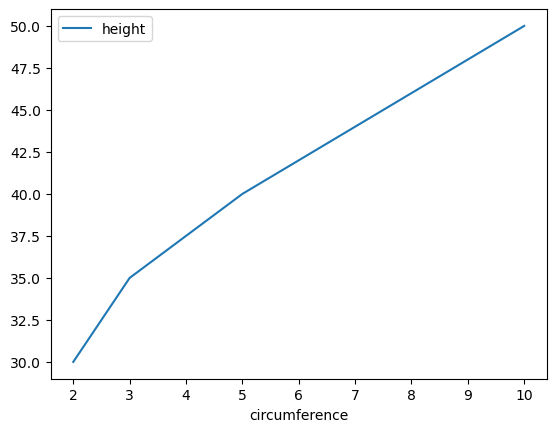

In [21]:
df.plot(x='circumference', y='height')